In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt




In [7]:
body = pd.read_csv('bodyPerformance.csv')

body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [8]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [9]:
#Displaying the columns in dataset
numerical_columns = body.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:")
print(numerical_columns)

categorical_columns = body.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')
Categorical Columns:
Index(['gender', 'class'], dtype='object')


age - Возраст (20-64)
gender - Пол (F/M)
weight_cm - Рост в сантиметрах (если хотите в футах, разделите на 30.48)
weight_kg - Вес в килограммах
body fat% - Процент жира в организме
diastolic - Диастолическое артериальное давление (минимальное значение)
systolic - Систолическое артериальное давление (минимальное значение)
gripForce - Силовой хват (grip force)
sit and bend forward_cm - Результат при сидении и наклоне вперед в сантиметрах
sit-ups counts - Количество подъемов тела (sit-ups)
broad jump_cm - Дальность прыжка в ширь (broad jump) в сантиметрах
class - Класс (A, B, C, D) - где A означает лучший класс, а остальные стратифицируются соответственно вашим требованиям.

In [12]:
body.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

Нет нулевых значений, а это отлично :)

In [14]:
# Замениv значения 'M' и 'F' числами
body['gender'] = body['gender'].replace({'M': 1, 'F': 0})
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [15]:

from sklearn.linear_model import LogisticRegression

X = body.drop('class', axis=1)
y = body['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели логистической регрессии
model = LogisticRegression()

# Обучение модели на обучающем наборе
model.fit(X_train, y_train)

# Оценка производительности модели на тестовом наборе
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5923852183650616


D:\Sigmoid home_task\task_4\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Такая низкая точность, так как данные не преобработаны (возможная гипотеза)

<Axes: >

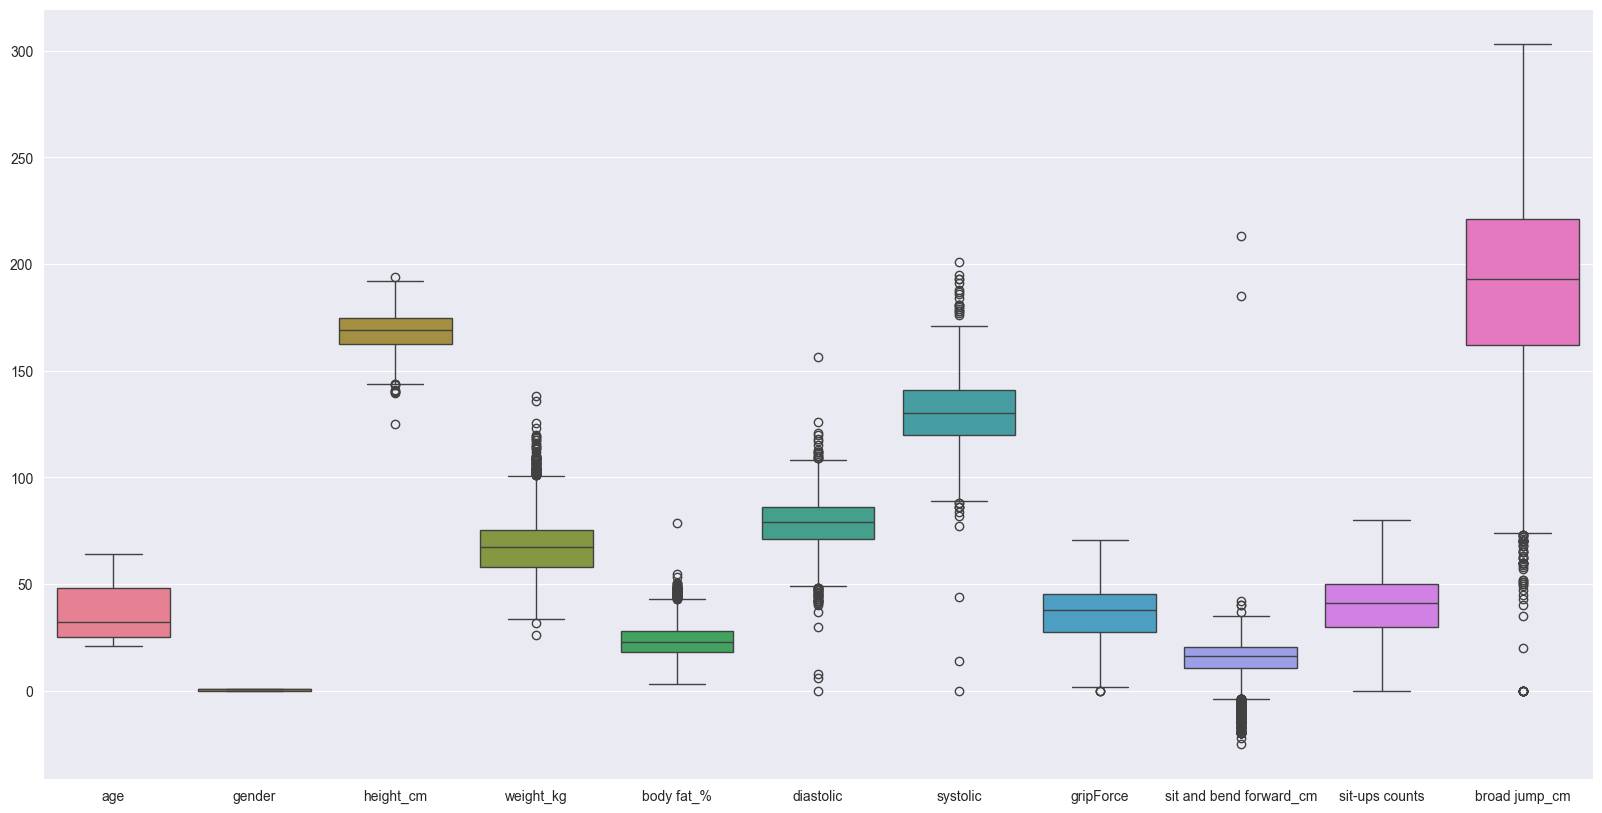

In [17]:

import seaborn as sns
#Boxlot pode traçar valores discrepantes nos dados
plt.figure(figsize = (20, 10))
sns.boxplot(data = body)

Видим много выбросов в признаках systolic, sit and bend forward_cm, broad jump_cm

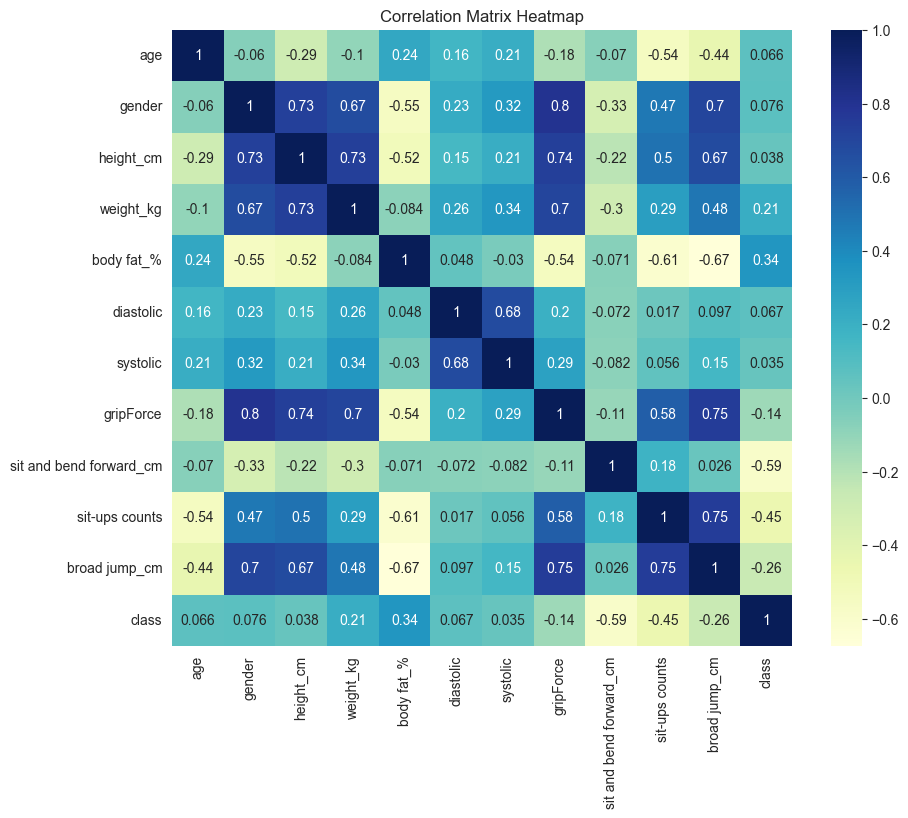

In [20]:
# Создайте копию DataFrame, чтобы изменения не затрагивали исходные данные
body_copy = body.copy()

# Замените значения 'class' числовыми значениями
body_copy['class'] = body_copy['class'].replace({'A': 1, 'B': 2, 'C': 3, 'D': 4})

# Вычислите корреляционную матрицу
corr_matrix = body_copy.corr(method='pearson')

# Постройте тепловую карту корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()


Видим, что больше всего на class влияют параметры,'age','weight_kg','height_cm', 'body fat_%', 'sit and bend forward_cm','sit-ups counts' . Попробуем на их основе научить модель.

In [19]:
body['class'] = body['class'].replace({'A': 1, 'B': 2,'C':3,'D':4})

array(['C', 'A', 'B', 'D'], dtype=object)

In [23]:

X = body[['age','weight_kg','height_cm', 'body fat_%', 'sit and bend forward_cm','sit-ups counts']]
y = body['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели логистической регрессии
model = LogisticRegression()

# Обучение модели на обучающем наборе
model.fit(X_train, y_train)

# Оценка производительности модели на тестовом наборе
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.5938783128032848


D:\Sigmoid home_task\task_4\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Всё-таки с этими признаками лучше, точность поднялась на 0.001

In [25]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate: float = 0.05, max_iter: int = 100000) -> None:
        """
        Initialize logistic regression model.

        :param learning_rate: float, default=0.05
            The learning rate of the model.
        :param max_iter: int, default=100000
            The number of iterations to go through.
        """
        # Setting up the hyperparameters.
        self.__learning_rate = learning_rate
        self.__max_iter = max_iter
        self.coef_ = None

    def sigmoid(self, y: np.array) -> np.array:
        """
        The sigmoid function.

        :param y: np.array
            The predictions of the linear function.
        :return: np.array
            The output of the sigmoid function.
        """
        return 1 / (1 + np.exp(-y))

    def fit(self, X: np.array, y: np.array) -> 'LogisticRegression':
        """
        Fit the logistic regression model.

        :param X: 2-d np.array
            The matrix with the features.
        :param y: 1-d np.array
            The target vector.
        :return: LogisticRegression
            The fitted logistic regression model.
        """
        # Creating the weights vector.
        self.coef_ = np.zeros(len(X[0]) + 1)
        # Adding the intercept column.
        X = np.hstack((X, np.ones((len(X), 1))))

        # The weights updating process.
        for _ in range(self.__max_iter):
            # Prediction.
            pred = self.sigmoid(np.dot(X, self.coef_))
            # Computing the gradient.
            gradient = np.dot(X.T, (pred - y)) / y.size
            # Updating the weights.
            self.coef_ -= gradient * self.__learning_rate

        return self

    def predict_proba(self, X: np.array) -> np.array:
        """
        Return the class probabilities.

        :param X: 2-d np.array
            The features matrix.
        :return: 2-d np.array
            The array with the probabilities for every class for every sample.
        """
        # Adding the intercept column.
        X = np.hstack((X, np.ones((len(X), 1))))
        # Computing the probabilities.
        prob = self.sigmoid(np.dot(X, self.coef_))
        # Returning the probabilities.
        return np.hstack(((1 - prob).reshape(-1, 1), prob.reshape(-1, 1)))

    def predict(self, X: np.array) -> np.array:
        """
        Return the predictions of the model.

        :param X: 2-d np.array
            The features matrix.
        :return: np.array
            The array with the predictions for every sample.
        """
        # Adding the intercept column.
        X = np.hstack((X, np.ones((len(X), 1))))
        return (self.sigmoid(np.dot(X, self.coef_)) > 0.5)


In [28]:
from sklearn.metrics import accuracy_score
X = body_copy[['age', 'weight_kg', 'height_cm', 'body fat_%', 'sit and bend forward_cm', 'sit-ups counts']].values
y = body_copy['class'].values

# Создание экземпляра модели
model = LogisticRegression(learning_rate=0.05, max_iter=100000)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели на обучающем наборе
model.fit(X_train, y_train)

# Прогнозирование вероятностей классов для тестового набора
proba_predictions = model.predict_proba(X_test)

# Прогнозирование бинарных результатов для тестового набора
binary_predictions = model.predict(X_test)

# Оценка производительности модели на тестовом наборе
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.255692422545726
